In [ ]:
from google.colab import drive # /content/drive/MyDrive/project/MachineLearning/dataset/mnist.pkl
drive.mount('/content/drive') # we use colab's libarary. So, uploading file google drive 

Mounted at /content/drive


Given a file weight-height.csv (from https://www.kaggle.com/mustafaali96/weight-height)

plot histograms, KDE, and Gaussian distribution with MLE
for the followings: (for nonparametric methods, find a proper hyperparameters)

-height all

-height male

-height female

-weight all

-weight male

-weight female

 

For histogram, you can use any module like https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html . 

However, for KDE and Gaussian, you have to implement them except plotting curves.

Submit a zip file including your report in pdf and your python source code.

데이터의 모집단 분포가 정규분포를 따르는지, 아니면 어떤 분포를 가지는지를 모르는 경우가 대부분이다. 
이런 이유로 실제 문제에서는 모수기반 분포추정보다는 모수없이 데이터만 사용하는 비모수적 추정
(non-parametric estimation) 방법이 많이 사용된다


# KDE (Kernal Density Estimation)
커널들을 조립하여 확률밀도함수(probability density function)의 모양을 찾는 비모수적 방법.
커널이란 분포를 찾을 때 사용되는 기본 단위라고 생각하면 된다. 대표적인 비모수 추정방법인 히스토그램(histogram)을 사각형 모양의 커널을 사용하는 비모수 추정 방법임

In [ ]:
# 라이브러리리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weight_h = pd.read_csv("/content/drive/MyDrive/project/MachineLearning/dataset/weight-height.csv")
weight_h.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


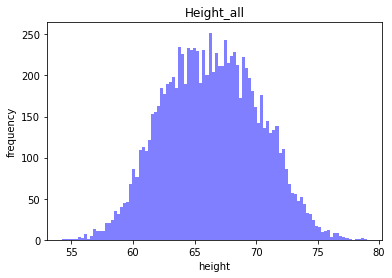

In [ ]:
# height_all
plt.hist(weight_h['Height'], bins = 100, facecolor = 'blue', alpha = 0.5)
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('Height_all')
plt.savefig('Histograms_height_all.png', bbox_inches='tight')

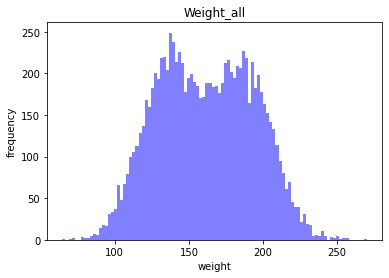

In [ ]:
# weight_all
plt.hist(weight_h['Weight'], bins = 100, facecolor = 'blue', alpha = 0.5)
plt.xlabel('weight')
plt.ylabel('frequency')
plt.title('Weight_all')
plt.savefig('Histograms_weight_all.png', bbox_inches='tight')

In [ ]:
# gender data: male select 
is_Male = weight_h['Gender'] == 'Male'
male_all = weight_h[is_Male]
male_all.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
# gender data: female
is_Female = weight_h['Gender'] == 'Female'
female_all = weight_h[is_Female]
female_all.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


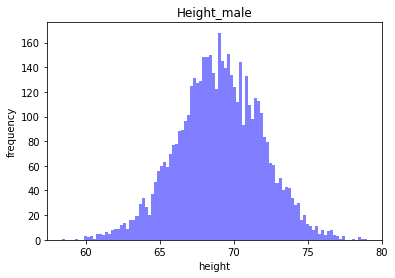

In [ ]:
# male height 
plt.hist(male_all['Height'], bins = 100, facecolor = 'blue', alpha = 0.5)
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('Height_male')
plt.savefig('Histograms_height_male.png', bbox_inches='tight')

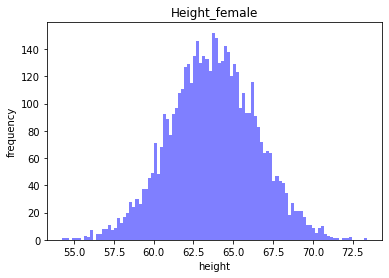

In [ ]:
# female height 
plt.hist(female_all['Height'], bins = 100, facecolor = 'blue', alpha = 0.5)
plt.xlabel('height')
plt.ylabel('frequency')
plt.title('Height_female')
plt.savefig('Histograms_height_female.png', bbox_inches='tight')

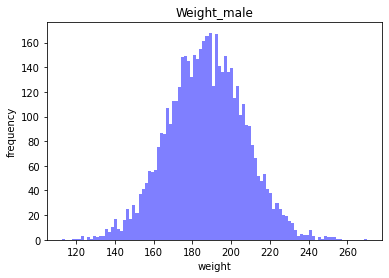

In [ ]:
# male weight 
plt.hist(male_all['Weight'], bins = 100, facecolor = 'blue', alpha = 0.5)
plt.xlabel('weight')
plt.ylabel('frequency')
plt.title('Weight_male')
plt.savefig('Histograms_weight_male.png', bbox_inches='tight')

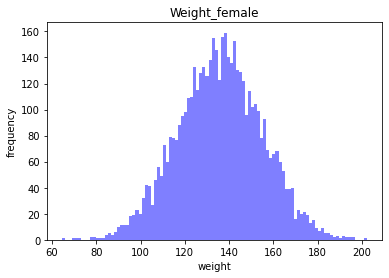

In [ ]:
# female weight 
plt.hist(female_all['Weight'], bins = 100, facecolor = 'blue', alpha = 0.5)
plt.xlabel('weight')
plt.ylabel('frequency')
plt.title('Weight_female')
plt.savefig('Histograms_weight_female.png', bbox_inches='tight')

In [ ]:
weightAllMean = weight_h['Weight'].mean()
heightAllMean = weight_h['Height'].mean()
print("weightAllMean: ", weightAllMean)
print("heightAllMean: ", heightAllMean)

# print(np.mean(weight_h['Weight'])) possible

weightAllStd = weight_h['Weight'].std()
heightAllStd = weight_h['Height'].std()
print("weightAllStd: ", weightAllStd)
print("heightAllStd: ", heightAllStd)

weightAllMean:  161.44035683283076
heightAllMean:  66.36755975482106
weightAllStd:  32.108439006519546
heightAllStd:  3.847528120773233


In [ ]:
mean_femaleh = np.mean(female_all['Height'])
std_femaleh = np.std(female_all['Height'])
mean_femalew = np.mean(female_all['Weight'])
std_femalew = np.std(female_all['Weight'])

print("Female_h Mean : ", mean_femaleh)
print("Female_h Std : ", std_femaleh)
print("Female_w Mean : ", mean_femalew)
print("Female_w Std : ", std_femalew)

Female_h Mean :  63.708773603424916
Female_h Std :  2.6960143738807107
Female_w Mean :  135.8600930074687
Female_w Std :  19.020565463416624


In [ ]:
mean_maleh = np.mean(male_all['Height'])
std_maleh = np.std(male_all['Height'])
mean_malew = np.mean(male_all['Weight'])
std_malew = np.std(male_all['Weight'])

print("Male_h Mean : ", mean_maleh)
print("Male_h Std : ", std_maleh)
print("Male_w Mean : ", mean_malew)
print("Male_w Std : ", std_malew)

Male_h Mean :  69.02634590621737
Male_h Std :  2.8630758781195427
Male_w Mean :  187.0206206581929
Male_w Std :  19.779176302396472


In [ ]:
sns.set()
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = np.random.randn(N)*weightAllStd+weightAllMean
    x[int(f * N):] += 5
    return x

x = make_data(10000)
#hist = plt.hist(x, bins=50, density = True)

In [ ]:
def normal_distribution(x, mean, std):
    dw = (1 / np.sqrt(2 * np.pi * std**2)) * np.exp(-(x-mean)**2 / (2 * std**2))
    #r = np.exp(-(a-mean)**2/(2*var))/ (np.sqrt(2 * np.pi * var))
    return dw

In [ ]:
normal_distribution(x, weightAllMean, weightAllStd)

array([9.97563285e-05, 1.01816343e-04, 1.03914390e-04, 1.06051067e-04,
       1.08226983e-04, 1.10442751e-04, 1.12698993e-04, 1.14996338e-04,
       1.17335423e-04, 1.19716892e-04, 1.22141395e-04, 1.24609593e-04,
       1.27122151e-04, 1.29679745e-04, 1.32283055e-04, 1.34932771e-04,
       1.37629592e-04, 1.40374221e-04, 1.43167371e-04, 1.46009764e-04,
       1.48902128e-04, 1.51845200e-04, 1.54839723e-04, 1.57886449e-04,
       1.60986140e-04, 1.64139563e-04, 1.67347495e-04, 1.70610719e-04,
       1.73930028e-04, 1.77306222e-04, 1.80740110e-04, 1.84232509e-04,
       1.87784241e-04, 1.91396141e-04, 1.95069050e-04, 1.98803816e-04,
       2.02601295e-04, 2.06462355e-04, 2.10387868e-04, 2.14378715e-04,
       2.18435786e-04, 2.22559980e-04, 2.26752201e-04, 2.31013366e-04,
       2.35344395e-04, 2.39746219e-04, 2.44219777e-04, 2.48766015e-04,
       2.53385889e-04, 2.58080361e-04, 2.62850402e-04, 2.67696991e-04,
       2.72621115e-04, 2.77623769e-04, 2.82705955e-04, 2.87868686e-04,
      

In [ ]:
def KDEF(data, width=1, gridsize=100, normalized=True, bounds=None):
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * width
        xmax = max(data) + 3 * width

    # grid points
    x = np.linspace(xmin, xmax, gridsize)
    mean = weightAllMean
    std = weightAllStd
    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
       #kde += norm.pdf(x, loc=val, scale=width)
       kde += normal_distribution(x, mean, std)
    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)

    return x, kde

In [ ]:
xw, kdew = KDEF(weight_h['Weight'], gridsize=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


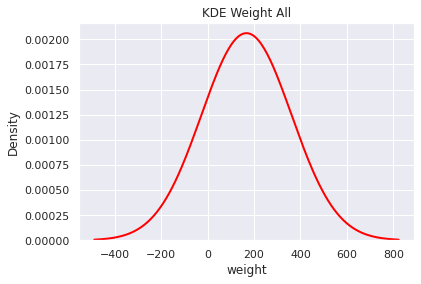

In [ ]:
ax = sns.distplot(xw, kdew, hist=False, color = 'red', hist_kws = {'edgecolor': 'black'}, kde_kws={'bw': 3, 'linewidth': 2})
ax.set_title('KDE Weight All')
ax.set_xlabel('weight')
ax.set_ylabel('Density')
plt.show()

In [ ]:
def KDEF(data, width=1, gridsize=100, normalized=True, bounds=None): 
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * width
        xmax = max(data) + 3 * width

    # grid points
    x = np.linspace(xmin, xmax, gridsize)
    mean = mean_malew
    std = std_malew
    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
       #kde += norm.pdf(x, loc=val, scale=width)
       kde += normal_distribution(x, mean, std)
    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)

    return x, kde

In [ ]:
xw1, kdew1 = KDEF(male_all['Weight'], gridsize=1000) # weight

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


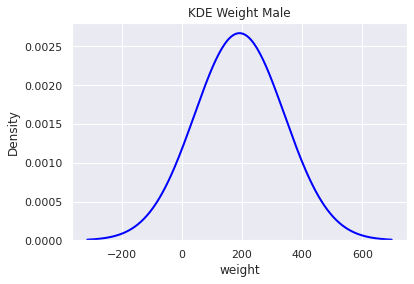

In [ ]:
ax = sns.distplot(xw1, kdew1, hist=False, color = 'blue', hist_kws = {'edgecolor': 'black'}, kde_kws={'bw': 3, 'linewidth': 2})
ax.set_title('KDE Weight Male')
ax.set_xlabel('weight')
ax.set_ylabel('Density')
plt.show()

In [ ]:
def KDEF(data, width=1, gridsize=100, normalized=True, bounds=None): 
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * width
        xmax = max(data) + 3 * width

    # grid points
    x = np.linspace(xmin, xmax, gridsize)
    mean = mean_femalew
    std = std_femalew
    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
       #kde += norm.pdf(x, loc=val, scale=width)
       kde += normal_distribution(x, mean, std)
    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)

    return x, kde

In [ ]:
xw2, kdew2 = KDEF(female_all['Weight'], gridsize=1000) # weight

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


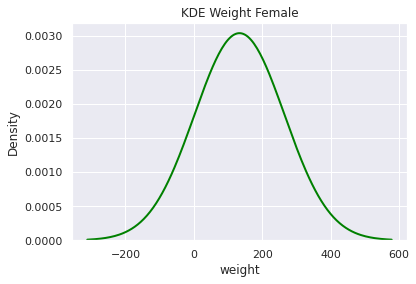

In [ ]:
ax = sns.distplot(xw2, kdew2, hist=False, color = 'green', hist_kws = {'edgecolor': 'black'}, kde_kws={'bw': 3, 'linewidth': 2})
ax.set_title('KDE Weight Female')
ax.set_xlabel('weight')
ax.set_ylabel('Density')
plt.show()

In [ ]:
def KDEF(data, width=1, gridsize=100, normalized=True, bounds=None): 
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * width
        xmax = max(data) + 3 * width

    # grid points
    x = np.linspace(xmin, xmax, gridsize)
    mean = heightAllMean
    std = heightAllStd
    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
       #kde += norm.pdf(x, loc=val, scale=width)
       kde += normal_distribution(x, mean, std)
    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)

    return x, kde

In [ ]:
xh, kdeh = KDEF(weight_h['Height'], gridsize=1000) # height

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


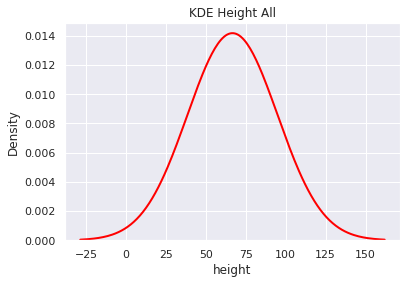

In [ ]:
ax = sns.distplot(xh, kdeh, hist=False, color = 'red', hist_kws = {'edgecolor': 'black'}, kde_kws={'bw': 3, 'linewidth': 2})
ax.set_title('KDE Height All')
ax.set_xlabel('height')
ax.set_ylabel('Density')
plt.show()

In [ ]:
def KDEF(data, width=1, gridsize=100, normalized=True, bounds=None): 
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * width
        xmax = max(data) + 3 * width

    # grid points
    x = np.linspace(xmin, xmax, gridsize)
    mean = mean_maleh
    std = std_maleh
    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
       #kde += norm.pdf(x, loc=val, scale=width)
       kde += normal_distribution(x, mean, std)
    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)

    return x, kde

In [ ]:
xh1, kdeh1 = KDEF(male_all['Height'], gridsize=1000) # height

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


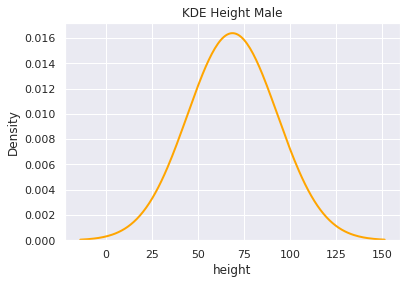

In [ ]:
ax = sns.distplot(xh1, kdeh1, hist=False, color = 'orange', hist_kws = {'edgecolor': 'black'}, kde_kws={'bw': 3, 'linewidth': 2})
ax.set_title('KDE Height Male')
ax.set_xlabel('height')
ax.set_ylabel('Density')
plt.show()

In [ ]:
def KDEF(data, width=1, gridsize=100, normalized=True, bounds=None): 
    # boundaries
    if bounds:
        xmin, xmax = bounds
    else:
        xmin = min(data) - 3 * width
        xmax = max(data) + 3 * width

    # grid points
    x = np.linspace(xmin, xmax, gridsize)
    mean = mean_femaleh
    std = std_femaleh
    # compute kde
    kde = np.zeros(gridsize)
    for val in data:
       #kde += norm.pdf(x, loc=val, scale=width)
       kde += normal_distribution(x, mean, std)
    # normalized the KDE
    if normalized:
        kde /= sp.integrate.simps(kde, x)

    return x, kde

In [ ]:
xh2, kdeh2 = KDEF(female_all['Height'], gridsize=1000) # height

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


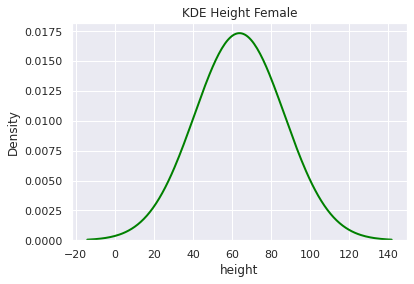

In [ ]:
ax = sns.distplot(xh2, kdeh2, hist=False, color = 'green', hist_kws = {'edgecolor': 'black'}, kde_kws={'bw': 3, 'linewidth': 2})
ax.set_title('KDE Height Female')
ax.set_xlabel('height')
ax.set_ylabel('Density')
plt.show()

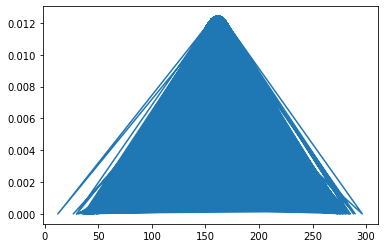

In [ ]:
import math
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def gaussian(x, mu, sig):
    return 1./(math.sqrt(2.*math.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

def lik(parameters):

    mu    = parameters[0]
    sigma = parameters[1]    
    n     = len(x)  
    L     = n/2.0 * np.log(2 * np.pi) + n/2.0 * math.log(sigma **2 ) + 1/(2*sigma**2) * sum([(x_ - mu)**2 for x_ in x ])

    return L
    
#mu0    = 10
#sigma0 = 2

dataw = np.random.randn(100000)*weightAllStd+weightAllMean
y = gaussian(dataw, dataw.mean(), dataw.std())


#lik_model = minimize(lik, np.array([5,5]), method='L-BFGS-B')


#mu    = lik_model['x'][0]
#sigma = lik_model['x'][1]

#print lik_model

#plt.plot(x, gaussian(x, mu, sigma), label = 'fit')
plt.plot(dataw, y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


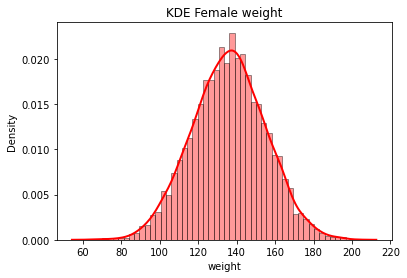

In [ ]:
# kernel density curve histograms - female_weight
ax = sns.distplot(female_all['Weight'], hist = True, kde = True, bins = 50, 
                  color = 'red', hist_kws = {'edgecolor': 'black'}, kde_kws={'linewidth': 2})

ax.set_title('KDE Female weight')
ax.set_xlabel('weight')
ax.set_ylabel('Density')
plt.show()


In [ ]:
#... P(x) =  1/n*h(math.pow()) 
# data => d
#  (1 / math.sqrt(2*math.pi) * math.pow(self._std, 2)) * np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2))))

In [ ]:
#y1 = (1 / np.sqrt(2 * np.pi * sigma1**2)) * np.exp(-(x-mu1)**2 / (2 * sigma1**2))
#y2 = (1 / np.sqrt(2 * np.pi * sigma2**2)) * np.exp(-(x-mu2)**2 / (2 * sigma2**2))
#y3 = (1 / np.sqrt(2 * np.pi * sigma3**2)) * np.exp(-(x-mu3)**2 / (2 * sigma3**2))

# height...
mu1, std1 = heightAllMean, heightAllStd # all
mu2, std2 = mean_maleh, std_maleh # male
mu3, std3 = mean_femaleh, std_femaleh # female

# weight...
muw1, stdw1 = weightAllMean, weightAllStd # all
muw2, stdw2 = mean_malew, std_malew # male
muw3, stdw3 = mean_femalew, std_femalew # female

In [ ]:
def Gaussian_WeightAll(std, mean): #weight
    x = np.random.randn(100000)*std + mean
    x.sort()
    y = normal_distribution_weightAll(x, mean, std)
    plt.figure(num = 0, figsize = (8, 6))
    plt.plot(x, y, alpha=0.5, color = 'orange', linewidth = 3)
    plt.title('Gaussian Weight_all')
    plt.xlabel("weight")
    plt.ylabel("$p(x)$")

In [ ]:
# weight_all(gender) 
def normal_distribution_weightAll(x, mean, std):
    dw = (1 / np.sqrt(2 * np.pi * std**2)) * np.exp(-(x-mean)**2 / (2 * std**2))
    #r = np.exp(-(a-mean)**2/(2*var))/ (np.sqrt(2 * np.pi * var))
    return dw

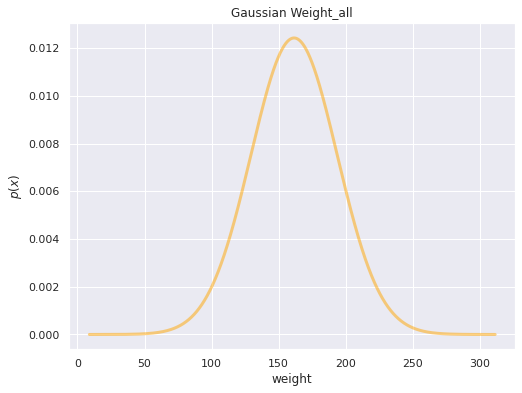

In [ ]:
Gaussian_WeightAll(stdw1, muw1)

In [ ]:
# data weigth all sample // Gaussian 
dataw = np.random.randn(100000)*weightAllStd+weightAllMean 
print(dataw.mean()) 
print(dataw.std())

161.62734435364393
32.07200396262351


Text(0, 0.5, '$p(x)$')

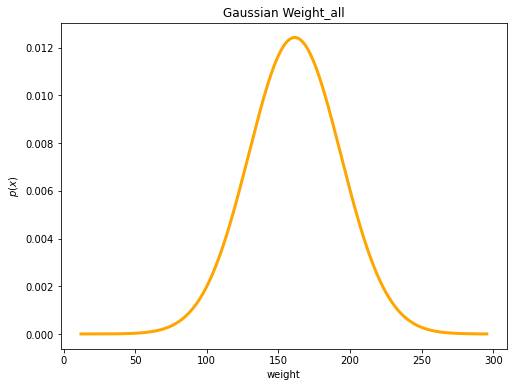

In [ ]:
dataw.sort() # weight all
plt.figure(num = 0, figsize = (8, 6))
#(1 / np.sqrt(2 * np.pi * std1**2)) * np.exp(-(daw-mu1)**2 / (2 * std1**2)) -> Gaussian distirbution 
dw = (1 / np.sqrt(2 * np.pi * weightAllStd**2)) * np.exp(-(dataw-weightAllMean)**2 / (2 * weightAllStd**2))
plt.plot(dataw, dw, color='orange', linewidth = 3)
plt.title("Gaussian Weight_all")
plt.xlabel("weight")
plt.ylabel("$p(x)$")


Gaussian Disdtr

In [ ]:
# data weight male sample // Gaussian 
dataw1 = np.random.randn(100000)*std_malew + mean_malew
print(dataw1.mean()) 
print(dataw1.std())

187.11383871211112
19.787652027804924


Text(0, 0.5, '$p(x)$')

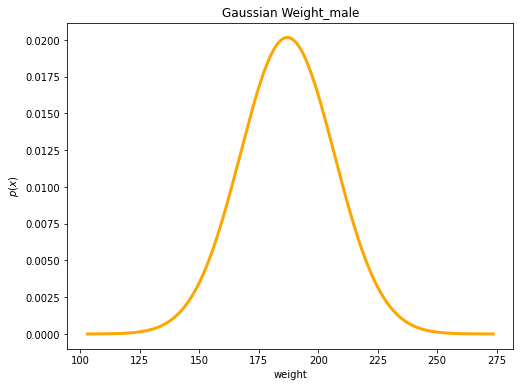

In [ ]:
dataw1.sort() # weight male
plt.figure(num = 0, figsize = (8, 6))
dw1 = (1 / np.sqrt(2 * np.pi * std_malew**2)) * np.exp(-(dataw1-mean_malew)**2 / (2 * std_malew**2))
plt.plot(dataw1, dw1, color='orange', linewidth = 3)
plt.title("Gaussian Weight_male")
plt.xlabel("weight")
plt.ylabel("$p(x)$")

In [ ]:
# data weight female sample // Gaussian 
dataw2 = np.random.randn(100000)*std_femalew + mean_femalew
print(dataw2.mean()) 
print(dataw2.std())

135.88942343827793
19.051259974432007


Text(0, 0.5, '$p(x)$')

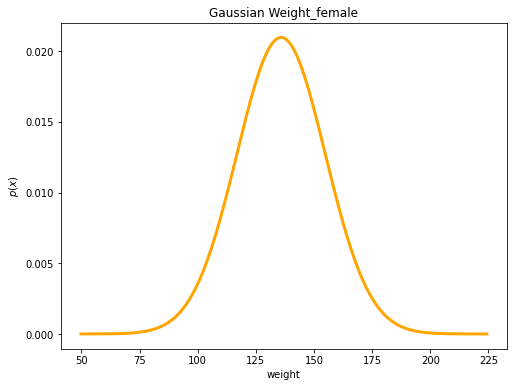

In [ ]:
dataw2.sort() # weight female
plt.figure(num = 0, figsize = (8, 6))
dw2 = (1 / np.sqrt(2 * np.pi * std_femalew**2)) * np.exp(-(dataw2-mean_femalew)**2 / (2 * std_femalew**2))
plt.plot(dataw2, dw2, color='orange', linewidth = 3)
plt.title("Gaussian Weight_female")
plt.xlabel("weight")
plt.ylabel("$p(x)$")

In [ ]:
# data height all sample // Gaussian 
datah = np.random.randn(100000)*heightAllStd + heightAllMean
print(datah.mean()) 
print(datah.std())

66.39106634576498
3.8466518888646877


Text(0, 0.5, '$p(x)$')

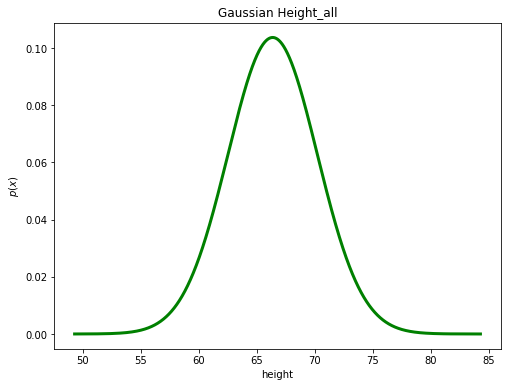

In [ ]:
datah.sort() # height all
plt.figure(num = 0, figsize = (8, 6))
dh = (1 / np.sqrt(2 * np.pi * heightAllStd**2)) * np.exp(-(datah-heightAllMean)**2 / (2 * heightAllStd**2))
plt.plot(datah, dh, color='green', linewidth = 3)
plt.title("Gaussian Height_all")
plt.xlabel("height")
plt.ylabel("$p(x)$")

In [ ]:
# data height male sample // Gaussian 
datah1 = np.random.randn(100000)*std_maleh + mean_maleh
print(datah1.mean()) 
print(datah1.std())

69.03566254563653
2.866719042932614


Text(0, 0.5, '$p(x)$')

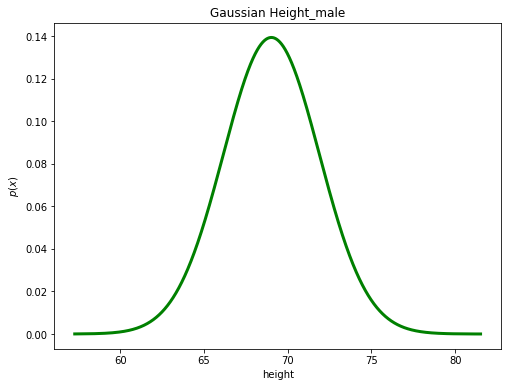

In [ ]:
datah1.sort() # height male
plt.figure(num = 0, figsize = (8, 6))
dh1 = (1 / np.sqrt(2 * np.pi * std_maleh**2)) * np.exp(-(datah1-mean_maleh)**2 / (2 * std_maleh**2))
plt.plot(datah1, dh1, color='green', linewidth = 3)
plt.title("Gaussian Height_male")
plt.xlabel("height")
plt.ylabel("$p(x)$")

In [ ]:
# data height female sample // Gaussian 
datah2 = np.random.randn(100000)*std_femaleh + mean_femaleh
print(datah2.mean()) 
print(datah2.std())

63.70105393181906
2.6907789967964093


Text(0, 0.5, '$p(x)$')

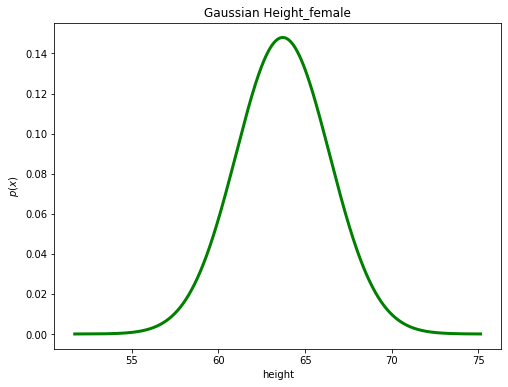

In [ ]:
datah2.sort() # height female
plt.figure(num = 0, figsize = (8, 6))
dh2 = (1 / np.sqrt(2 * np.pi * std_femaleh**2)) * np.exp(-(datah2-mean_femaleh)**2 / (2 * std_femaleh**2))
plt.plot(datah2, dh2, color='green', linewidth = 3)
plt.title("Gaussian Height_female")
plt.xlabel("height")
plt.ylabel("$p(x)$")

In [ ]:
# height male
rv = sp.stats.norm(mu2, std2) # smaple data gauss
np.random.seed(0)
y = rv.rvs(20)
y

array([74.07696163, 70.17202636, 71.82854702, 75.44219317, 74.37330614,
       66.22832518, 71.74652114, 68.59299873, 68.7308225 , 70.20192057,
       69.43875358, 73.1900413 , 71.20525466, 69.37471071, 70.29716002,
       69.98168082, 73.30400766, 68.43896223, 69.92268249, 66.581005  ])

In [ ]:
sns.distplot(y, rug=True, kde='Gaussian', fit=sp.stats.norm)
plt.title("m")
plt.xlabel("")
plt.ylabel("$p(x)$")
plt.show()

In [ ]:
# all weight
rv = sp.stats.norm(muw1, stdw1) # smaple data gauss
np.random.seed(0)
x1 = rv.rvs(20)
x1

array([218.08132399, 174.28878015, 192.8661057 , 233.39193944,
       221.40472865, 130.06148963, 191.94621284, 156.58051314,
       158.12616063, 174.62403379, 166.06537105, 208.13480903,
       185.87609021, 165.34715168, 175.69211237, 172.15411862,
       209.41290362, 154.85304523, 171.49247204, 134.01667588])

In [ ]:
sns.distplot(v, rug=True, kde='Gaussian', fit=sp.stats.norm)
plt.title("Female")
plt.xlabel("표본값")
plt.ylabel("$p(x)$")
plt.show()



In [ ]:
# weight_all(gender) 
def normal_distribution_weightAll(x):
    var = np.var(male_all['Weight'])
    mean = np.mean(male_all['Weight'])
    r = (1 / np.sqrt(2 * np.pi * var)) * np.exp(-(x-mu1)**2 / (2 * var))
    #r = np.exp(-(a-mean)**2/(2*var))/ (np.sqrt(2 * np.pi * var))
    return r

In [ ]:
def Gaussian_WeightAll(mean):
    x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 100) + mean
    my_y = normal_distribution_weightAll(x)
    scipy_y = norm.pdf(a, loc=mean, scale=np.std(x))
    #plt.figure(num = 0, figsize = (10, 8))
    #plt.plot(x, my_y, alpha=0.5, color='blue', label='my normal distribution')
    plt.plot(x, scipy_y, alpha=0.5, color='red', label='scipy normal distribution')
    plt.title('male')
    plt.legend()

Gaussian_WeightAll(male_all['Weight'])

In [ ]:


import numpy as np
import math


class MLE():
    def __init__(self, samples, m, std, learning_rate, epochs, verbose=False):
        """
        :param samples: samples for get MLE
        :param learning_rate: alpha on weight update
        :param epochs: training epochs
        :param verbose: print status
        """
        self._samples = samples
        self._m = m
        self._std = std
        self._learning_rate = learning_rate
        self._epochs = epochs
        self._verbose = verbose


    def likelihood(self, x, M):
        """
        Probability Density Function is Normal distribution
        PDF's y is same as likelihood

        :param x:
        :return: likelihood of input x (likelihood of input x is same as y of pdf)
        """
        return (1 / math.sqrt(2*math.pi) * math.pow(self._std, 2)) * np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2))))


    def fit(self):
        """
        training estimator
        M, which minimizes Likelihood, is obtained by the gradient descent method.
        M is the MLE of the samples
        """

        # init M
        self._estimator = np.random.normal(self._m, self._std, 1)

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):
            likelihood = np.prod(self.likelihood(self._samples, self._m))
            prediction = np.prod(self.likelihood(self._samples, self._estimator))
            cost = self.cost(likelihood, prediction)
            self._training_process.append((epoch, cost))
            self.update(self._samples, self._estimator)

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self, likelihood, prediction):
        """
        cost function
        :param likelihood: likelihood of population
        :param prediction: likelihood in samples
        :return: the cost of optimizing the parameters
        """
        return math.sqrt(likelihood - prediction)


    def update(self, x, M):
        """
        update in gradient descent
        gradient is approximated
        :param x: samples
        :param M: estimator
        """
        gradient = np.sum(np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2)))))
        if self._m > self._estimator:
            self._estimator += self._learning_rate * gradient
        else:
            self._estimator -= self._learning_rate * gradient


    def get_mle(self):
        """
        parameter getter
        :return: estimator of MLE
        """
        return self._estimator


# run example
if __name__ == "__main__":

    # samples for MLE
    datah2 = np.random.randn(100000)*std_femaleh + mean_femaleh
    samples = np.array(datah2)

    # assumptions about the population
    mean = np.array(mean_femalew)
    std = std_femalew

    # get MLE
    estimator = MLE(samples, mean, std, learning_rate=0.1, epochs=30, verbose=True)
    estimator.fit()
    result = 0
    result = estimator.get_mle()
    print(result)

Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
[162.84280433]


In [ ]:
import numpy as np

def gaussian_mle(data):                                                                                                                                                                               
    mu = data.mean(axis=0)                                                                                                                                                                            
    var = (data-mu).T @ (data-mu) / data.shape[0] #  this is slightly suboptimal, but instructive

    return mu, var                                                                                                                                                                                    